## Workflow Orchestration

We can manage the machine learning workflow by using prefect which is a python-based open source and helps developers to manage pipelines,schedule the flow, easily identify the failures.

After installing prefect, we need to open the prefect UI by command "prefect server start"

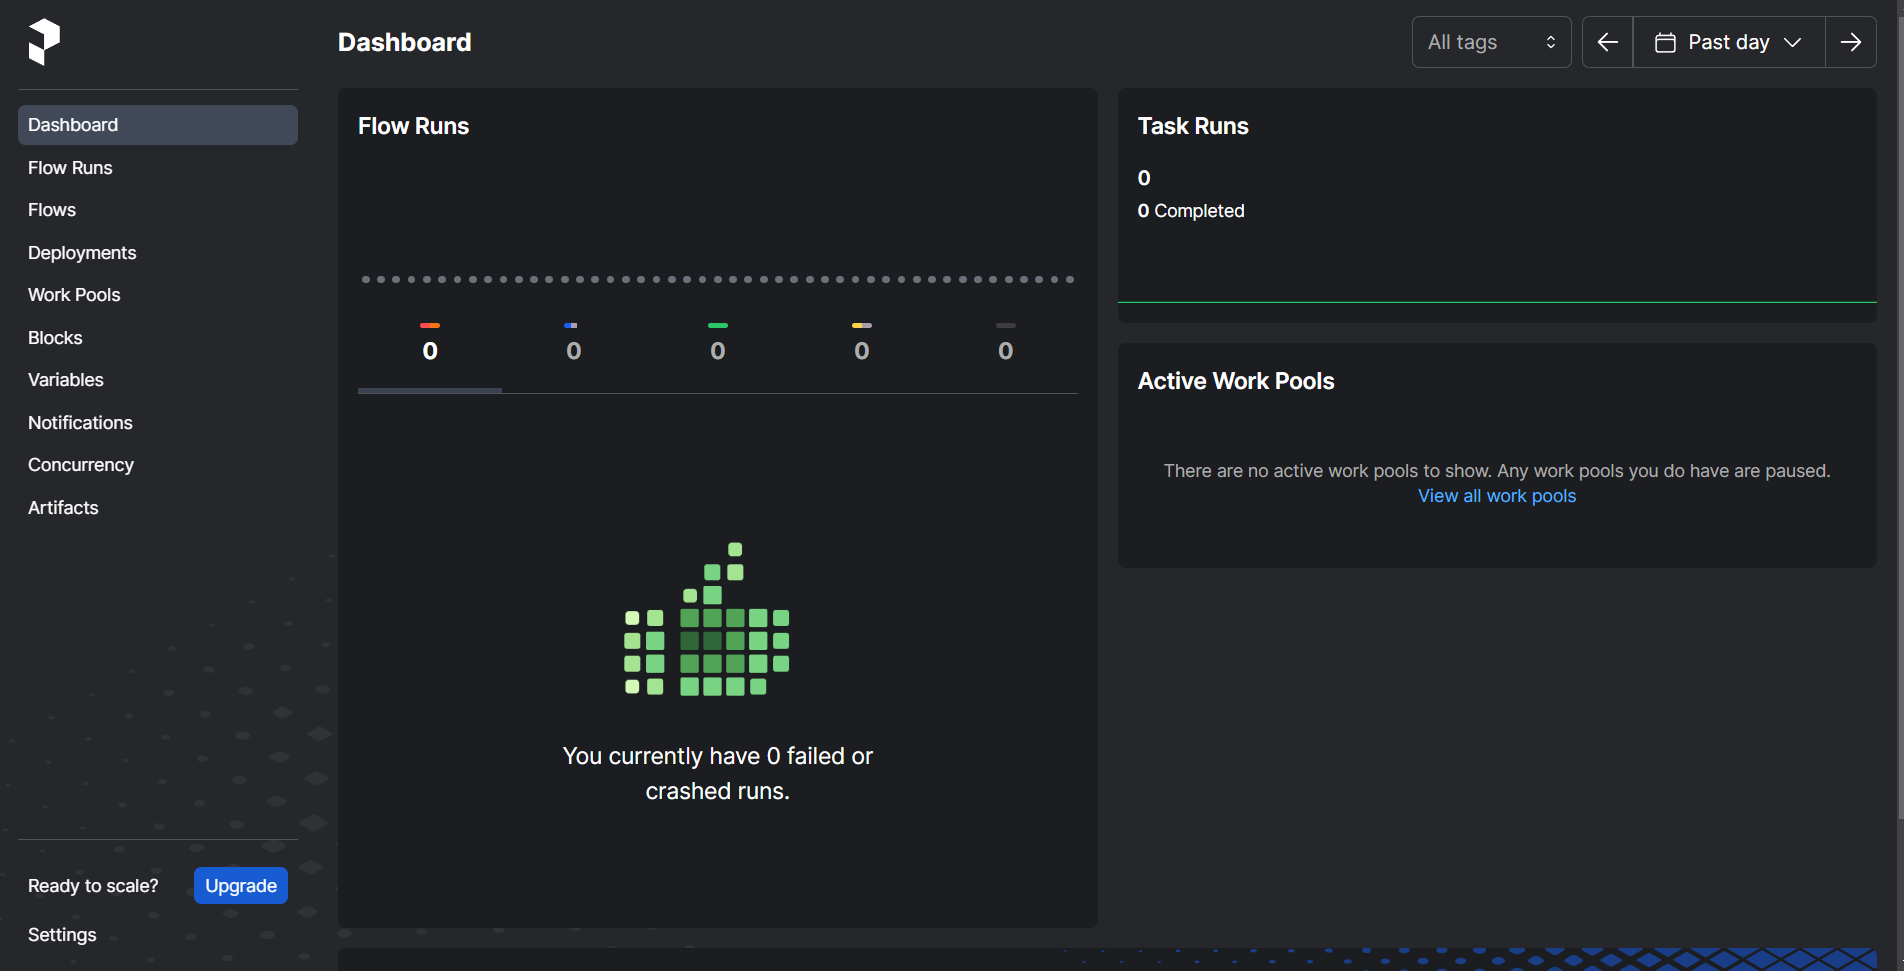

In [161]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [162]:
# a function to load the data
def load(path):
    df=pd.read_csv(path)
    df['Ratings'] = df['Ratings'].apply(change_rating)
    return df.head()

In [163]:
# a function to identify the input and output
def split_inputs_output(data,inputs,output):
    X=data[inputs]
    y=data[output]
    return X,y

In [164]:
def change_rating(value):
    if pd.notnull(value):
        if value > 2:
            return "Positive"
        else:
            return "Negative"
    else:
        return None

In [165]:
# a function to split the train and test data
def split_train_test(X,y,test_size=0.25,random_state=0):
    return train_test_split(X,y,test_size=test_size,random_state=random_state)

In [166]:
# a function to clean the data
def clean(X_train,X_test,y_train):
    X_train=X_train.fillna(method='pad')
    X_test=X_train.fillna(method='pad')
    y_train=X_train.fillna(method='pad')
    return X_train,X_test,y_train

In [167]:
#importing the required libraries
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [168]:
lemmatizer=WordNetLemmatizer()

In [170]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [171]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\varsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [172]:
# a function to preprocess the data
def preprocess(raw_text,words_to_remove):
    sentence=re.sub("[^a-zA-Z]"," ",raw_text)
    for i in words_to_remove:
        pattern=re.compile(r'\b%s\b|\b%s(?=\w)|(?<=\w)%s\b' % (i,i,i),flags=re.IGNORECASE)
        sentence=pattern.sub('',sentence)
    sentence=sentence.lower() #changing to lower case
    tokens=sentence.split()
    clean_tokens=[t for t in tokens if not t in stopwords.words("english")]
    clean_tokens=[lemmatizer.lemmatize(word) for word in clean_tokens]
    return pd.Series([" ".join(clean_tokens),len(clean_tokens)]) 

In [179]:
words_to_remove=["read","more","shuttle","product"]
def preprocessing_for_all(X_train,X_test):
    words_to_remove=["read","more","shuttle","product"]
    X_train_clean=X_train.apply(lambda x:preprocess(x,words_to_remove))
    X_test_clean=X_test.apply(lambda x:preprocess(x,words_to_remove))
    X_train_clean.columns=['clean_text_lemma','text_length_lemma']
    X_test_clean.columns=['clean_text_lemma2','text_length_lemma2']
    return X_train_clean,X_test_clean

In [180]:
from sklearn.feature_extraction.text import CountVectorizer
vocab = CountVectorizer()
def transform_data(X_train_clean,X_test_clean):
    X_train_bow = vocab.fit_transform(X_train_clean['clean_text_lemma'])
    X_test_bow = vocab.fit_transform(X_test_clean['clean_text_lemma2'])
    return X_train_bow,X_test_bow

In [181]:
# a function to train the model
def train_model(X_train_clean,y_train,hyperparameters):
    clf=DecisionTreeClassifier(**hyperparameters)
    clf.fit(X_train_clean,y_train)
    return clf

In [182]:
from sklearn.preprocessing import LabelBinarizer

def evaluate_model(model, X_train_bow, y_train, X_test_bow, y_test):
    y_train_pred = model.predict(X_train_bow)
    y_test_pred = model.predict(X_test_bow)
    train_score = metrics.f1_score(y_train, y_train_pred,average='macro')
    test_score = metrics.f1_score(y_test, y_test_pred,average='macro')
    return train_score, test_score

In [183]:
def workflow(data_path):
    path = data_path
    inputs = 'Review text'
    output = 'Ratings'
    HYPERPARAMETERS = {'max_depth': 5}
    # Load data
    data = load(path)


    # Identify Inputs and Output
    X, y = split_inputs_output(data, inputs, output)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = split_train_test(X, y)

    X_train,X_test,y_train=clean(X_train,X_test,y_train)
    
    # Preprocess the data
    X_train_clean, X_test_clean = preprocessing_for_all(X_train, X_test)
    
    #Executing Bag of Words
    X_train_bow,X_test_bow=transform_data(X_train_clean,X_test_clean)
    print(X_train_bow)
    # Build a model
    model = train_model(X_train_bow, y_train, HYPERPARAMETERS)
    
    # Evaluation
    train_score, test_score = evaluate_model(model, X_train_bow, y_train, X_test_bow, y_test)
    
    print("Train Score:", train_score)
    print("Test Score:", test_score)

In [184]:
if __name__=="__main__":
    workflow(data_path="C://Users//varsh//Downloads//reviews_data_dump//reviews_badminton//data.csv")

  (0, 31)	1
  (0, 38)	2
  (0, 18)	1
  (0, 21)	1
  (0, 7)	1
  (0, 0)	1
  (0, 15)	1
  (0, 5)	1
  (0, 27)	1
  (0, 14)	1
  (1, 18)	1
  (1, 24)	1
  (1, 20)	1
  (1, 23)	3
  (1, 6)	4
  (1, 17)	3
  (1, 37)	2
  (1, 3)	1
  (1, 35)	1
  (1, 13)	1
  (1, 32)	1
  (1, 12)	1
  (1, 25)	1
  (1, 2)	1
  (1, 19)	1
  (1, 29)	1
  (1, 28)	1
  (1, 9)	1
  (1, 30)	1
  (1, 33)	1
  (1, 16)	1
  (2, 22)	1
  (2, 26)	1
  (2, 34)	1
  (2, 36)	1
  (2, 1)	1
  (2, 4)	1
  (2, 8)	1
  (2, 11)	1
  (2, 10)	1


ValueError: Found input variables with inconsistent numbers of samples: [2, 3]

In [145]:
from prefect import task, flow

In [146]:
@task
def load(path):
    df=pd.read_csv(path)
    df['Ratings'] = df['Ratings'].apply(change_rating)
    return df.head()

@task
def split_inputs_output(data,inputs,output):
    X=data[inputs]
    y=data[output]
    return X,y

def change_rating(value):
    if pd.notnull(value):
        if value > 2:
            return "Positive"
        else:
            return "Negative"
    else:
        return None

@task
def split_train_test(X,y,test_size=0.25,random_state=0):
    return train_test_split(X,y,test_size=test_size,random_state=random_state)

@task
def clean(X_train,X_test,y_train):
    X_train=X_train.fillna(method='pad')
    X_test=X_train.fillna(method='pad')
    y_train=X_train.fillna(method='pad')
    return X_train,X_test,y_train

def preprocess(raw_text,words_to_remove):
    sentence=re.sub("[^a-zA-Z]"," ",raw_text)
    for i in words_to_remove:
        pattern=re.compile(r'\b%s\b|\b%s(?=\w)|(?<=\w)%s\b' % (i,i,i),flags=re.IGNORECASE)
        sentence=pattern.sub('',sentence)
    sentence=sentence.lower() #changing to lower case
    tokens=sentence.split()
    clean_tokens=[t for t in tokens if not t in stopwords.words("english")]
    clean_tokens=[lemmatizer.lemmatize(word) for word in clean_tokens]
    return pd.Series([" ".join(clean_tokens),len(clean_tokens)])

@task
def preprocessing_for_all(X_train,X_test):
    words_to_remove=["read","more","shuttle","product"]
    X_train_clean=X_train.apply(lambda x:preprocess(x,words_to_remove))
    X_test_clean=X_test.apply(lambda x:preprocess(x,words_to_remove))
    X_train_clean.columns=['clean_text_lemma','text_length_lemma']
    X_test_clean.columns=['clean_text_lemma2','text_length_lemma2']
    return X_train_clean,X_test_clean

@task
def transform_data(X_train_clean,X_test_clean):
    X_train_bow = vocab.fit_transform(X_train_clean['clean_text_lemma'])
    X_test_bow = vocab.fit_transform(X_test_clean['clean_text_lemma2'])
    return X_train_bow,X_test_bow

@task
def train_model(X_train_clean,y_train,hyperparameters):
    clf=DecisionTreeClassifier(**hyperparameters)
    clf.fit(X_train_clean,y_train)
    return clf

@task
def evaluate_model(model, X_train_bow, y_train, X_test_bow, y_test):
    y_train_pred = model.predict(X_train_bow)
    y_test_pred = model.predict(X_test_bow)
    y_train = y_train[:2]
    train_score = metrics.f1_score(y_train, y_train_pred,average='macro')
    test_score = metrics.f1_score(y_test, y_test_pred,average='macro')
    return train_score, test_score

@flow(name="Decision Tree Training Flow")
def workflow(data_path):
    path = d
    inputs = 'Review text'
    output = 'Ratings'
    HYPERPARAMETERS = {'max_depth': 5}
    # Load data
    data = load(path)


    # Identify Inputs and Output
    X, y = split_inputs_output(data, inputs, output)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = split_train_test(X, y)

    X_train,X_test,y_train=clean(X_train,X_test,y_train)
    
    # Preprocess the data
    X_train_clean, X_test_clean = preprocessing_for_all(X_train, X_test)
    
    #Executing Bag of Words
    X_train_bow,X_test_bow=transform_data(X_train_clean,X_test_clean)
    print(X_train_bow)
    # Build a model
    model = train_model(X_train_bow, y_train, HYPERPARAMETERS)
    
    # Evaluation
    train_score, test_score = evaluate_model(model, X_train_bow, y_train, X_test_bow, y_test)
    
    print("Train Score:", train_score)
    print("Test Score:", test_score)

In [159]:
if __name__ == "__main__":
    workflow(data_path="C://Users//varsh//Downloads//reviews_data_dump//reviews_badminton//data.csv")

RuntimeError: Tasks cannot be run outside of a flow by default. If you meant to submit an autonomous task, you need to set `prefect config set PREFECT_EXPERIMENTAL_ENABLE_TASK_SCHEDULING=true` and use `your_task.submit()` instead of `your_task()`. Mapping autonomous tasks is not yet supported.

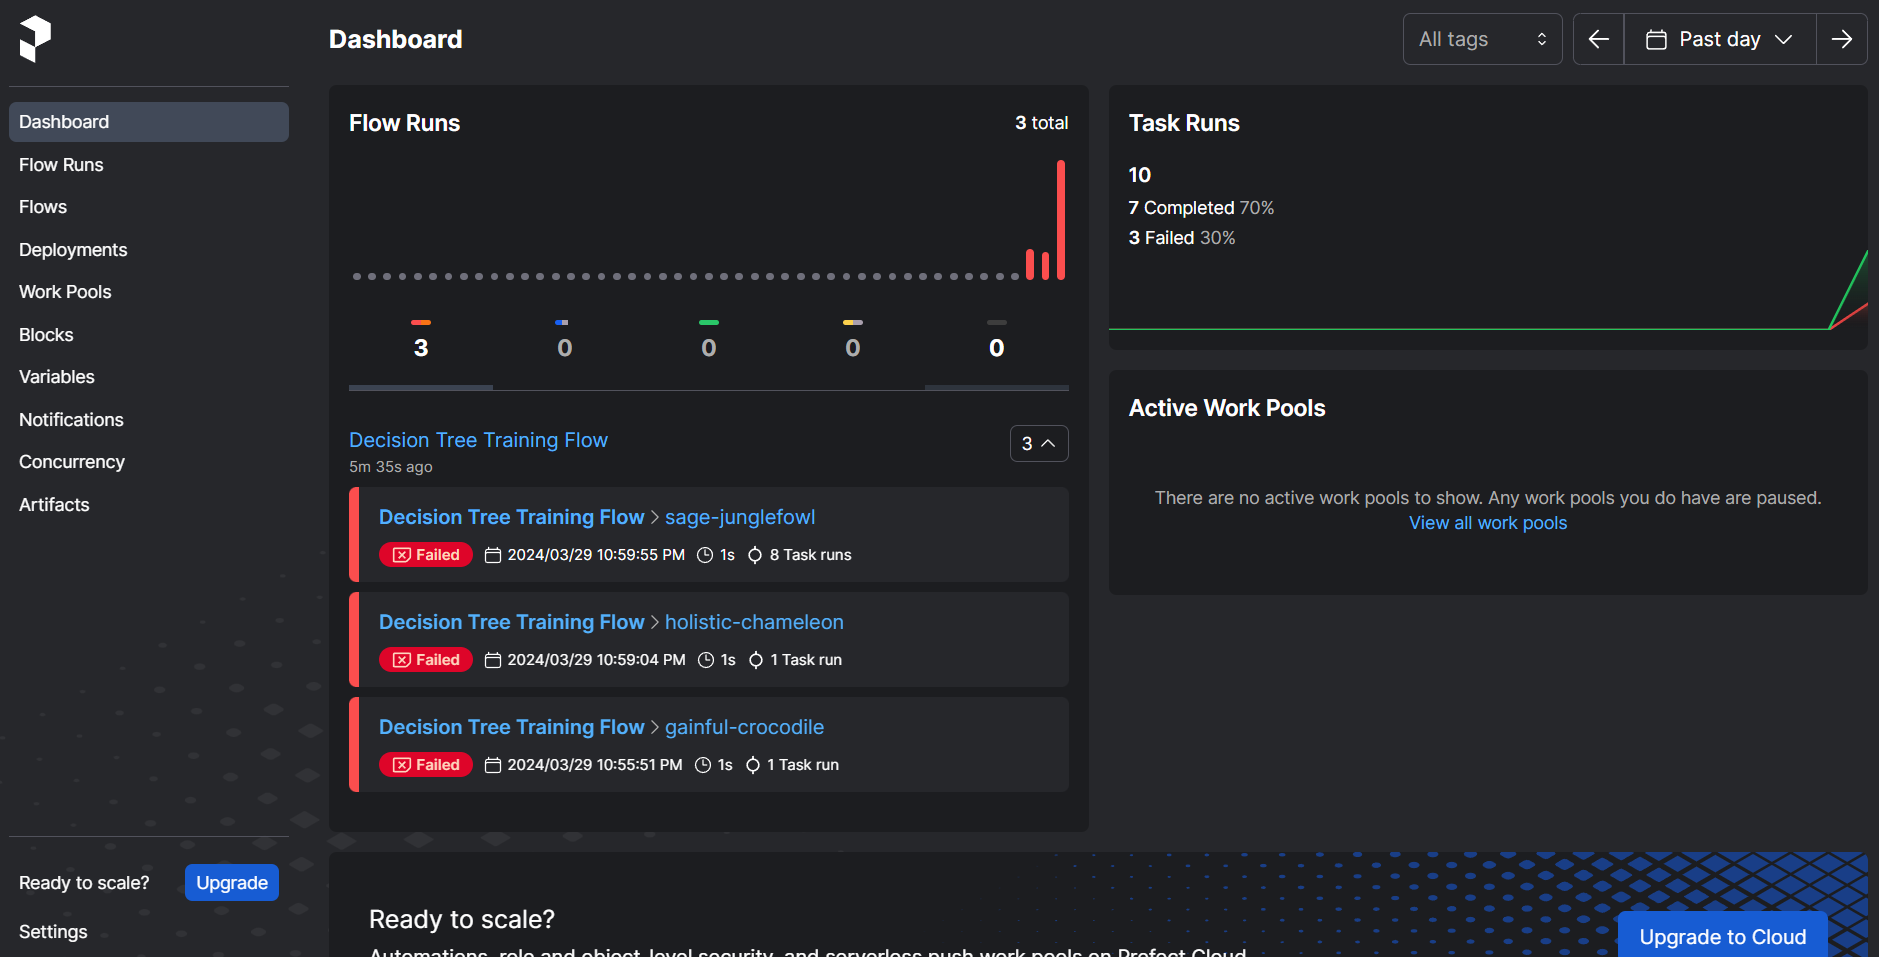

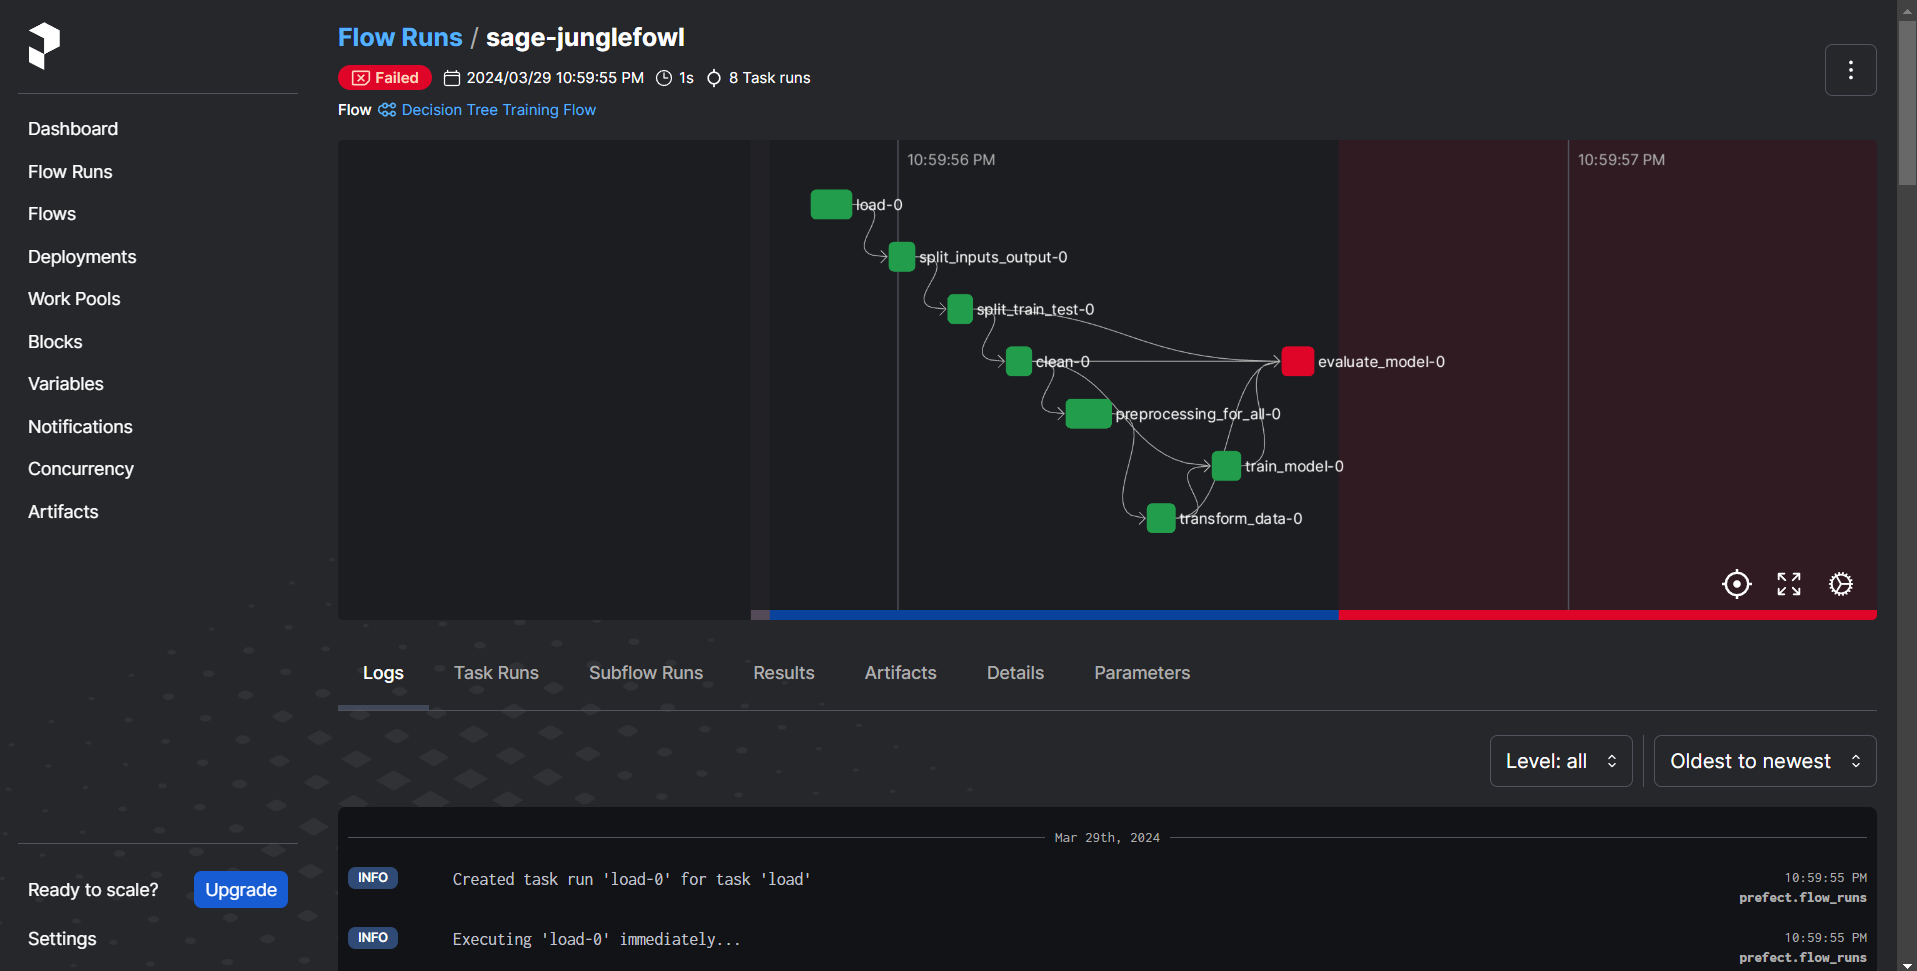

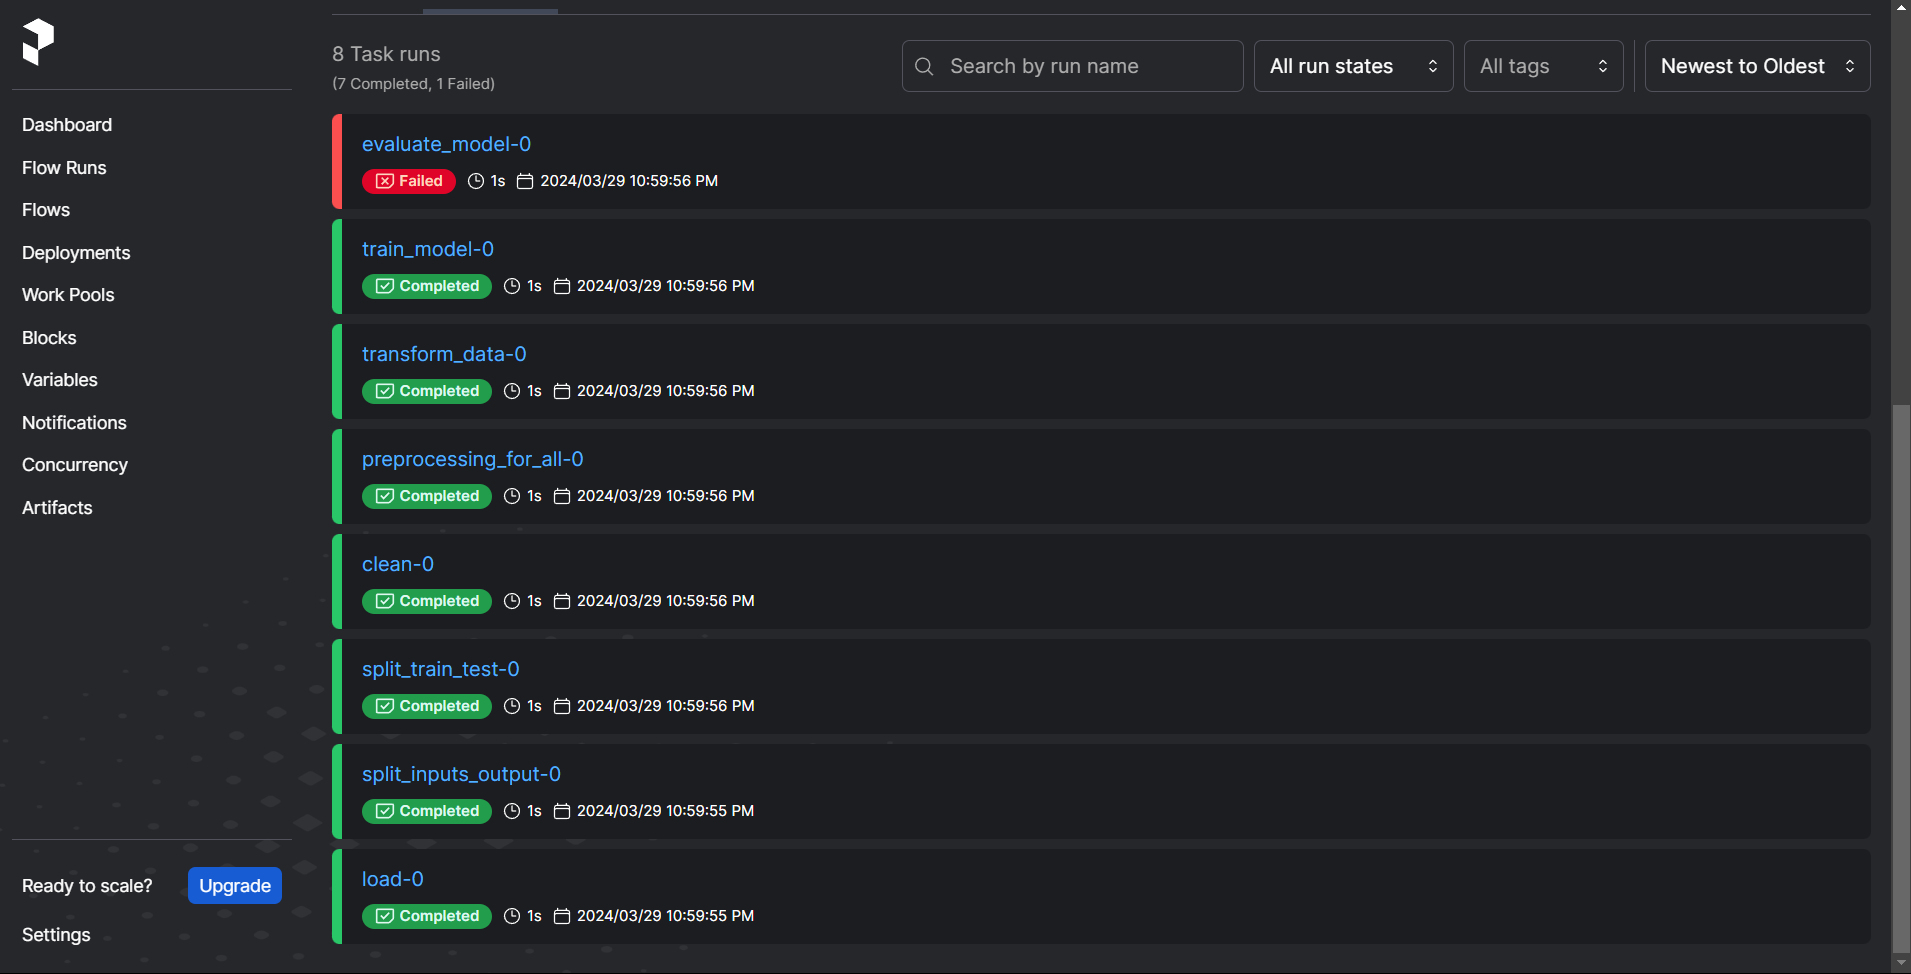